In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
df.head(6)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955


In [4]:
x = {'acept':True, 'not acept':False}
df['animal'] = df['animal'].map(x)

In [5]:
df.head(6)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,True,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,True,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,True,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,True,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,False,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,True,not furnished,0,8000,834,121,8955


In [6]:
y = {'furnished':True, 'not furnished':False}
df['furniture'] = df['furniture'].map(y)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  bool  
 7   furniture            10692 non-null  bool  
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: bool(2), int64(9), object(2)
memory usage: 856.3+ KB
None


In [8]:
print(df.shape)

(10692, 13)


In [9]:
pd.set_option('precision', 0)

In [10]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692,10692,10692,10692,1e+04,10692,10692,10692,1e+04
mean,149,3,2,2,1e+03,3896,367,53,5e+03
std,537,1,1,2,2e+04,3409,3108,48,2e+04
min,11,1,1,0,0e+00,450,0,3,5e+02
25%,56,2,1,0,2e+02,1530,38,21,2e+03
50%,90,2,2,1,6e+02,2661,125,36,4e+03
75%,182,3,3,2,1e+03,5000,375,68,7e+03
max,46335,13,10,12,1e+06,45000,313700,677,1e+06


In [11]:
df.describe(include='object')

,city,floor
count,10692,10692
unique,5,35
top,São Paulo,-
freq,5887,2461


In [12]:
df['animal'].value_counts()

True     8316
False    2376
Name: animal, dtype: int64

In [13]:
df['furniture'].value_counts()

False    8086
True     2606
Name: furniture, dtype: int64

In [14]:
df.sort_values(by=['rooms'], ascending = False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
7835,Rio de Janeiro,439,13,4,3,-,True,False,0,15000,667,229,15900
5178,São Paulo,400,10,9,8,-,True,False,0,8330,550,126,9006
1639,São Paulo,400,10,5,8,-,True,False,0,10900,1417,164,12480
752,Belo Horizonte,341,10,6,7,-,True,False,0,5500,459,91,6050
9565,São Paulo,400,9,4,4,-,True,False,100,12000,500,181,12780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,São Paulo,49,1,1,1,18,False,True,600,5400,0,69,6069
2864,São Paulo,35,1,1,1,7,True,False,430,2100,0,27,2557
8806,Rio de Janeiro,55,1,2,1,15,True,True,695,2750,50,36,3531
5247,São Paulo,23,1,1,1,12,True,True,600,2800,99,36,3535


In [15]:
#here we can see that amount of rooms influences on rent amount that consequently affects the target (total price) 

In [16]:
df.sort_values(by=['bathroom'], ascending=False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2055,São Paulo,998,7,10,4,-,True,True,0,15000,5000,226,20230
9021,Belo Horizonte,458,8,10,4,-,True,False,0,7000,419,115,7534
8187,São Paulo,700,4,10,0,-,True,False,0,15000,8750,226,23980
1130,São Paulo,360,4,9,8,-,True,False,0,8540,1329,129,9998
5178,São Paulo,400,10,9,8,-,True,False,0,8330,550,126,9006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Belo Horizonte,92,2,1,0,-,True,False,0,1200,60,20,1280
5075,São Paulo,30,1,1,1,9,True,False,1,1930,0,25,1956
5072,São Paulo,39,1,1,1,24,False,True,600,4200,125,54,4979
5071,Belo Horizonte,66,2,1,1,13,True,False,385,550,26,8,969


In [17]:
#bathrooms amount affects the same way rooms amount do: the more bathrooms(or rooms), the more price.
#Now let`s have a look at the max total amount value.

In [18]:
df.sort_values(by=['rent amount (R$)'], ascending=False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2182,São Paulo,700,4,7,8,-,True,False,0,45000,8750,677,54430
7748,São Paulo,350,3,3,3,-,True,False,0,30000,560,451,31010
6947,São Paulo,486,8,4,6,-,True,False,0,25000,2200,376,27580
2619,São Paulo,80,2,1,1,1,True,False,875,24000,0,305,25180
1743,São Paulo,410,4,5,5,1,True,False,0,20000,0,254,20250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8070,Campinas,30,1,1,0,15,True,False,280,500,10,7,797
7502,Porto Alegre,40,1,1,0,1,True,False,328,500,140,8,976
5152,São Paulo,35,1,1,0,-,False,False,0,500,0,8,508
4022,Belo Horizonte,31,1,1,1,3,False,False,550,460,92,7,1109


In [19]:
#we can see that the number we got in two previous frames is much smaller than first maximem rent prices. 
#Here we can see that city and area influence a lot. Let`s check the area and rent amount dependence:

In [20]:
df.sort_values(by=['area'], ascending=False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2397,Belo Horizonte,46335,4,8,5,11,True,True,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,True,False,2254,8100,7859,103,18320
9241,Campinas,12732,3,2,0,3,True,False,700,1600,96,21,2417
8790,Belo Horizonte,2000,3,3,2,2,True,True,3000,5000,200,67,8267
5129,Belo Horizonte,2000,4,2,3,-,True,False,0,4956,200,82,5238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,São Paulo,15,1,1,0,-,False,True,0,1200,83,16,1299
1588,São Paulo,13,1,1,0,2,True,False,0,2200,42,28,2270
4864,São Paulo,13,1,1,0,1,True,False,0,2200,5,28,2233
6784,São Paulo,12,1,1,0,-,False,False,0,950,50,13,1013


In [21]:
#Here we can see that it is not what we expected to. So the only factor left is city. It affects rent amount the most
#so it means that the total price will grow as well. Now let`s figure out how many cities are presented in a list:

In [22]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [23]:
#The company offers its service in 5 cities. 
#Let`s check avreage total price in every city:

In [24]:
df.loc[df['city'] == 'São Paulo'].mean()

area                   2e+02
rooms                  3e+00
bathroom               2e+00
parking spaces         2e+00
animal                 8e-01
furniture              3e-01
hoa (R$)               1e+03
rent amount (R$)       5e+03
property tax (R$)      5e+02
fire insurance (R$)    6e+01
total (R$)             6e+03
dtype: float64

In [25]:
df.loc[df['city'] == 'Porto Alegre'].mean()

area                   1e+02
rooms                  2e+00
bathroom               2e+00
parking spaces         1e+00
animal                 8e-01
furniture              3e-01
hoa (R$)               5e+02
rent amount (R$)       2e+03
property tax (R$)      1e+02
fire insurance (R$)    4e+01
total (R$)             3e+03
dtype: float64

In [26]:
df.loc[df['city'] == 'Rio de Janeiro'].mean()

area                   1e+02
rooms                  2e+00
bathroom               2e+00
parking spaces         7e-01
animal                 8e-01
furniture              3e-01
hoa (R$)               1e+03
rent amount (R$)       3e+03
property tax (R$)      3e+02
fire insurance (R$)    4e+01
total (R$)             5e+03
dtype: float64

In [27]:
df.loc[df['city'] == 'Campinas'].mean()

area                   1e+02
rooms                  2e+00
bathroom               2e+00
parking spaces         2e+00
animal                 8e-01
furniture              1e-01
hoa (R$)               6e+02
rent amount (R$)       2e+03
property tax (R$)      1e+02
fire insurance (R$)    3e+01
total (R$)             3e+03
dtype: float64

In [28]:
df.loc[df['city'] == 'Belo Horizonte'].mean()

area                   2e+02
rooms                  3e+00
bathroom               2e+00
parking spaces         2e+00
animal                 7e-01
furniture              1e-01
hoa (R$)               2e+03
rent amount (R$)       4e+03
property tax (R$)      3e+02
fire insurance (R$)    5e+01
total (R$)             6e+03
dtype: float64

In [29]:
# Belo Horizonte and sao paulo have the biggest averege areas. They are also the most expensive cities in the list
#Porto Alegre and Campinas are the cheapest cities

In [30]:
plt.rcParams['figure.figsize'] = (8, 6)

In [31]:
#Now I want to see how much the fire insurance affects the total price. 
#For that lets combine rent amoun and property tax columns:

In [32]:
df['non-insurance price'] = df['rent amount (R$)'] + df['property tax (R$)']
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),non-insurance price
0,São Paulo,70,2,1,1,7,True,True,2065,3300,211,42,5618,3511
1,São Paulo,320,4,4,0,20,True,False,1200,4960,1750,63,7973,6710
2,Porto Alegre,80,1,1,1,6,True,False,1000,2800,0,41,3841,2800
3,Porto Alegre,51,2,1,0,2,True,False,270,1112,22,17,1421,1134
4,São Paulo,25,1,1,0,1,False,False,0,800,25,11,836,825


In [33]:
#We can see that fire insurance is not important fact in price formation. 
#It means that hoa also important component affecting the total price.
#lets look at its max and mean:

In [34]:
df.sort_values(by=['hoa (R$)'], ascending=False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),non-insurance price
255,Belo Horizonte,155,1,4,0,4,False,False,1117000,2790,64,38,1120000,2854
6979,Belo Horizonte,155,1,4,0,4,False,False,1117000,2790,64,38,1120000,2854
6230,São Paulo,340,5,4,2,7,True,False,220000,12000,1000,153,233200,13000
2859,São Paulo,285,4,5,4,6,True,True,200000,20000,1834,254,222100,21834
2928,Rio de Janeiro,35,1,1,0,1,True,True,81150,4500,9900,58,95610,14400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,Porto Alegre,55,3,1,0,-,False,False,0,720,8,13,741,728
5821,Campinas,160,3,1,4,-,False,False,0,3400,135,52,3587,3535
5832,São Paulo,80,2,2,1,-,False,False,0,1500,75,23,1598,1575
5845,São Paulo,50,1,1,0,-,False,False,0,1200,84,19,1303,1284


In [49]:
df['hoa (R$)'].mean()

1174.0216984661429

In [ ]:
#I`m really surprised with the results. Its maximum value can be even much more important than the rent amount. 
#But when I got the mean I realised that this factor is quite important but can`t be compared wit rent price. 
#Interestingly that only Belo Horizonte has such a big price for hoa..
#Now let`s have a look which city is the most loyal about having animals in houses:

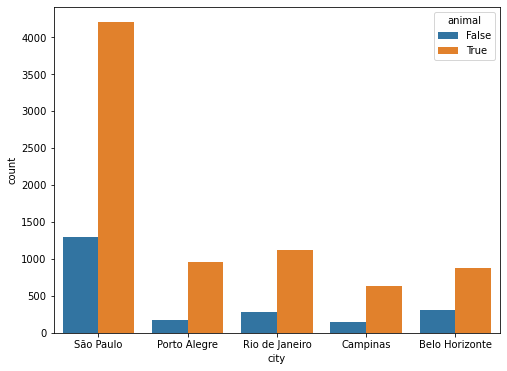

In [52]:
sns.countplot(x='city', hue='animal', data=df.head(10000));
plt.savefig('total_and_furniture.png', dpi=300);

In [ ]:
#It is Sao Paulo. But I would say that there are many houses accepting pet in other cities as well.
#What about furniture?

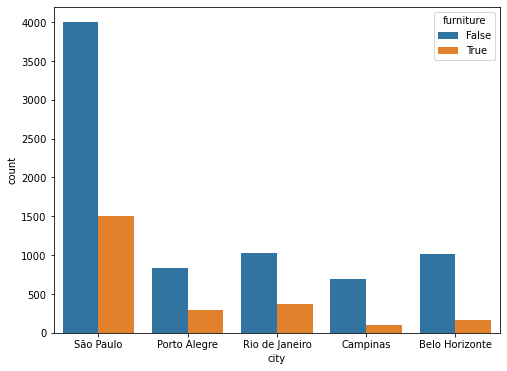

In [55]:
sns.countplot(x='city', hue='furniture', data=df.head(10000));
plt.savefig('total_and_furniture.png', dpi=300);

In [62]:
#There is a bad situation with furniture with furniture in most of the countries. And this factor doesn`t affect the price.
#let`s look at the parking spaces graph.

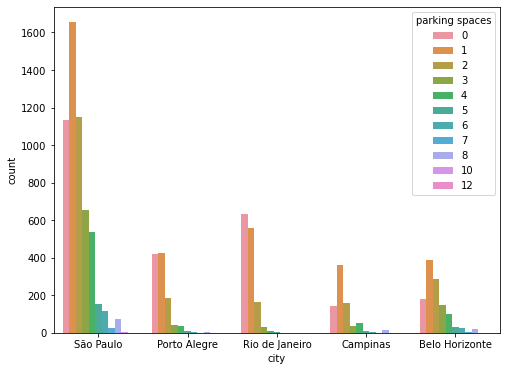

In [64]:
sns.countplot(x='city', hue='parking spaces', data=df.head(10000));
plt.savefig('total_and_furniture.png', dpi=300);

In [ ]:
#We can see that mostly people will get just 1 parking place.
#We should say, that Belo Horizonte can`t provide people with parking places for such a big rent price.
#Let`s look what city has the highest rent price:

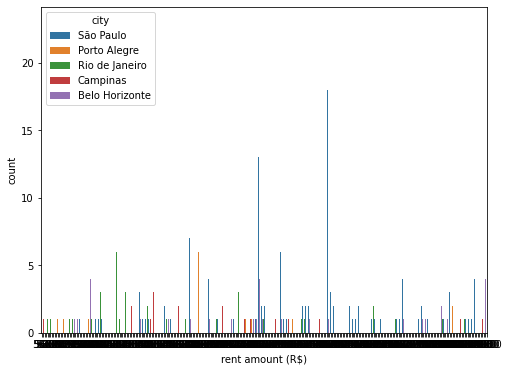

In [68]:
sns.countplot(x='rent amount (R$)', hue='city', data=df.head(1000));
plt.savefig('total_and_furniture.png', dpi=500);

In [ ]:
#And it is Sao Paulo again. 
#Nevertheless Belo Horizonte has the most expensive houses Sao paulo has more houses to rent. 
#So the average price is higher.
#Althouth we found that floor doesn`t affect the price a lot, lets have a look where the biggest flor options are.
#We need it to finish our hypothesys of the best city to rent the house.

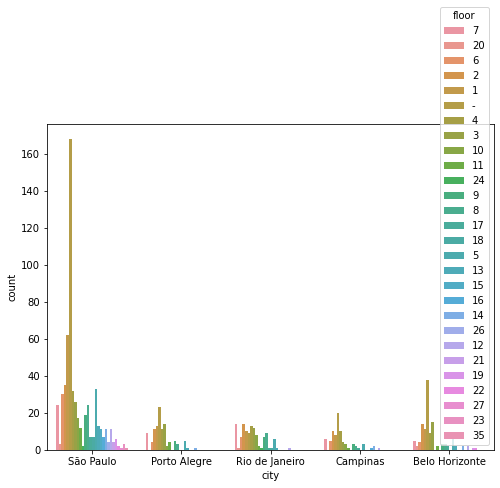

In [70]:
sns.countplot(x='city', hue='floor', data=df.head(1000));
plt.savefig('total_and_furniture.png', dpi=300);

In [ ]:
#And we have the same leaders again.
#For now let`s try to find property tax and city dependency:

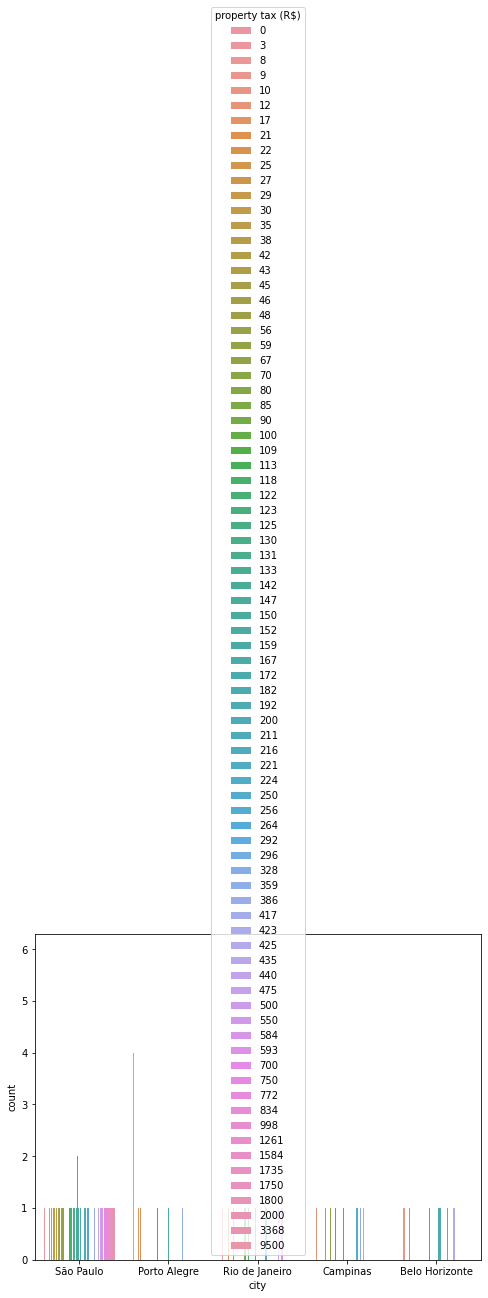

In [72]:
sns.countplot(x='city', hue='property tax (R$)', data=df.head(100));
plt.savefig('total_and_furniture.png', dpi=300);

In [74]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),non-insurance price
0,São Paulo,70,2,1,1,7,True,True,2065,3300,211,42,5618,3511
1,São Paulo,320,4,4,0,20,True,False,1200,4960,1750,63,7973,6710
2,Porto Alegre,80,1,1,1,6,True,False,1000,2800,0,41,3841,2800
3,Porto Alegre,51,2,1,0,2,True,False,270,1112,22,17,1421,1134
4,São Paulo,25,1,1,0,1,False,False,0,800,25,11,836,825


In [ ]:
#I would say that Sao Paulo it a leader again, because it has a big range of prices and an average price dominates here.

In [75]:
#according to the analysis  I can say tha Sao Paolo is the most comfortable city for renting a house. 
#It has a wide range of prices and conditions.
#If you have animals, it is not a problem to take them with you. Most of houses will allow you to have a pet.
#If you want to live closer to the clouds, Sao Paolo and Rio de Janeiro are cities for you.
#the only disadvantage of this sity is that you will have too spend some money for furniture.
#_____________________________________________________________________________________________

#according to the annalisys I`ve figured out that total price is the target variable. 
#top variables affecting the price: 
#rent amount->city->area->hoa->property tax->rooms->bathroom->floor->fire insurance->animal->furniture->parking spaces.
